<a href="https://colab.research.google.com/github/Tambo-Academy/Deep-Learning/blob/main/BERT_EDA_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT

> BERT, or Bidirectional Encoder Representations from Transformers, is a new method of pre-training language representations which obtains state-of-the-art results on a wide array of Natural Language Processing (NLP) tasks.

> BERT is an open source machine learning framework for natural language processing (NLP). BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context.Bidirectional Encoder Representations from Transformers is a transformer-based machine learning technique for natural language processing pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google.

>Why is BERT so good?
* Number 1: pre-trained on a lot of data. 
* Number 2: accounts for a word's context. 
* Number 3: open-source.

>BERT is a method of pre-training language representations, meaning that we train a general-purpose "language understanding" model on a large text corpus (like Wikipedia), and then use that model for downstream NLP tasks that we care about (like question answering). BERT outperforms previous methods because it is the first unsupervised, deeply bidirectional system for pre-training NLP.

>Unsupervised means that BERT was trained using only a plain text corpus, which is important because an enormous amount of plain text data is publicly available on the web in many languages.

>Pre-trained representations can also either be context-free or contextual, and contextual representations can further be unidirectional or bidirectional. Context-free models such as word2vec or GloVe generate a single "word embedding" representation for each word in the vocabulary, so bank would have the same representation in bank deposit and river bank. Contextual models instead generate a representation of each word that is based on the other words in the sentence.

>BERT was built upon recent work in pre-training contextual representations — including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, and ULMFit — but crucially these models are all unidirectional or shallowly bidirectional. This means that each word is only contextualized using the words to its left (or right). For example, in the sentence I made a bank deposit the unidirectional representation of bank is only based on I made a but not deposit. Some previous work does combine the representations from separate left-context and right-context models, but only in a "shallow" manner. BERT represents "bank" using both its left and right context — I made a ... deposit — starting from the very bottom of a deep neural network, so it is deeply bidirectional.

>BERT uses a simple approach for this: We mask out 15% of the words in the input, run the entire sequence through a deep bidirectional Transformer encoder, and then predict only the masked words. For example:
* Input: the man went to the [MASK1] . he bought a [MASK2] of milk.
* Labels: [MASK1] = store; [MASK2] = gallon

>In order to learn relationships between sentences, we also train on a simple task which can be generated from any monolingual corpus: Given two sentences A and B, is B the actual next sentence that comes after A, or just a random sentence from the corpus?
* Sentence A: the man went to the store .
* Sentence B: he bought a gallon of milk .
Label: IsNextSentence
* Sentence A: the man went to the store .
* Sentence B: penguins are flightless .
Label: NotNextSentence


> We then train a large model (12-layer to 24-layer Transformer) on a large corpus (Wikipedia + BookCorpus) for a long time (1M update steps), and that's BERT.

**Using BERT has two stages: Pre-training and fine-tuning.**

> Pre-training is fairly expensive (four days on 4 to 16 Cloud TPUs), but is a one-time procedure for each language (current models are English-only, but multilingual models will be released in the near future). We are releasing a number of pre-trained models from the paper which were pre-trained at Google. Most NLP researchers will never need to pre-train their own model from scratch.

> Fine-tuning is inexpensive. All of the results in the paper can be replicated in at most 1 hour on a single Cloud TPU, or a few hours on a GPU, starting from the exact same pre-trained model. SQuAD, for example, can be trained in around 30 minutes on a single Cloud TPU to achieve a Dev F1 score of 91.0%, which is the single system state-of-the-art.

> The other important aspect of BERT is that it can be adapted to many types of NLP tasks very easily. In the paper, we demonstrate state-of-the-art results on sentence-level (e.g., SST-2), sentence-pair-level (e.g., MultiNLI), word-level (e.g., NER), and span-level (e.g., SQuAD) tasks with almost no task-specific modifications.




## 1. Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

This project will be successful when: 

* Having a model with at least 85% accuracy.


### c) Understanding the context 

Reference materials: 
1.   [Introduction to Multilingual BERT](https://iq.opengenus.org/multilingual-bert/)
2.   [Google Research Repo](https://github.com/google-research/bert)
3.  [BERT multilingual base model (cased)](https://huggingface.co/bert-base-multilingual-cased)
4. [BERTje: A Dutch BERT model](https://github.com/wietsedv/bertje)
5. [LSTM vs BERT — a step-by-step guide for tweet sentiment analysis](https://towardsdatascience.com/lstm-vs-bert-a-step-by-step-guide-for-tweet-sentiment-analysis-ced697948c47)
6.  [The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)](https://jalammar.github.io/illustrated-bert/)
7. [Jacob delvin BERT](https://web.stanford.edu/class/cs224n/slides/Jacob_Devlin_BERT.pdf)
8. [Twitter Sentiment Analysis with Deep Learning using BERT and Hugging Face](https://medium.com/mlearning-ai/twitter-sentiment-analysis-with-deep-learning-using-bert-and-hugging-face-830005bcdbbf)
9. [Tensorflow documentation](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)
10. [Twitter Sentiment Analysis with BERT + RoBERTa](www.kaggle.com/code/ludovicocuoghi/twitter-sentiment-analysis-with-bert-roberta/notebooktps://) 

**Models**

>There are two multilingual models currently available. We do not plan to release more single-language models, but we may release BERT-Large versions of these two in the future:

* BERT-Base, Multilingual Cased (New, recommended): 104 languages, 12-layer, 768-hidden, 12-heads, 110M parameters
* BERT-Base, Multilingual Uncased (Orig, not recommended): 102 languages, 12-layer, 768-hidden, 12-heads, 110M parameters
* BERT-Base, Chinese: Chinese Simplified and Traditional, 12-layer, 768-hidden, 12-heads, 110M parameters

>The Multilingual Cased (New) model also fixes normalization issues in many languages, so it is recommended in languages with non-Latin alphabets (and is often better for most languages with Latin alphabets). When using this model, make sure to pass --do_lower_case=false to run_pretraining.py and other scripts.

>See the list of languages that the Multilingual model supports. The Multilingual model does include Chinese (and English), but if your fine-tuning data is Chinese-only, then the Chinese model will likely produce better results.

>Translate Train means that the MultiNLI training set was machine translated from English into the foreign language. So training and evaluation were both done in the foreign language. Unfortunately, training was done on machine-translated data, so it is impossible to quantify how much of the lower accuracy (compared to English) is due to the quality of the machine translation vs. the quality of the pre-trained model.

>Translate Test means that the XNLI test set was machine translated from the foreign language into English. So training and evaluation were both done on English. However, test evaluation was done on machine-translated English, so the accuracy depends on the quality of the machine translation system.

>Zero Shot means that the Multilingual BERT system was fine-tuned on English MultiNLI, and then evaluated on the foreign language XNLI test. In this case, machine translation was not involved at all in either the pre-training or fine-tuning.

>Note that the English result is worse than the 84.2 MultiNLI baseline because this training used Multilingual BERT rather than English-only BERT. This implies that for high-resource languages, the Multilingual model is somewhat worse than a single-language model. However, it is not feasible for us to train and maintain dozens of single-language models. Therefore, if your goal is to maximize performance with a language other than English or Chinese, you might find it beneficial to run pre-training for additional steps starting from our Multilingual model on data from your language of interest.

Tokenization

>For tokenization, we use a 110k shared WordPiece vocabulary. The word counts are weighted the same way as the data, so low-resource languages are upweighted by some factor. We intentionally do not use any marker to denote the input language (so that zero-shot training can work).

>Because Chinese (and Japanese Kanji and Korean Hanja) does not have whitespace characters, we add spaces around every character in the CJK Unicode range before applying WordPiece. This means that Chinese is effectively character-tokenized. Note that the CJK Unicode block only includes Chinese-origin characters and does not include Hangul Korean or Katakana/Hiragana Japanese, which are tokenized with whitespace+WordPiece like all other languages.

>For all other languages, we apply the same recipe as English: (a) lower casing+accent removal, (b) punctuation splitting, (c) whitespace tokenization. We understand that accent markers have substantial meaning in some languages, but felt that the benefits of reducing the effective vocabulary make up for this. Generally the strong contextual models of BERT should make up for any ambiguity introduced by stripping accent markers.

List of Languages

>The multilingual model supports the following languages. These languages were chosen because they are the top 100 languages with the largest Wikipedias:

Afrikaans
Albanian
Arabic
Aragonese
Armenian
Asturian
Azerbaijani
Bashkir
Basque
Bavarian
Belarusian
Bengali
Bishnupriya Manipuri
Bosnian
Breton
Bulgarian
Burmese
Catalan
Cebuano
Chechen
Chinese (Simplified)
Chinese (Traditional)
Chuvash
Croatian
Czech
Danish
Dutch
English
Estonian
Finnish
French
Galician
Georgian
German
Greek
Gujarati
Haitian
Hebrew
Hindi
Hungarian
Icelandic
Ido
Indonesian
Irish
Italian
Japanese
Javanese
Kannada
Kazakh
Kirghiz
Korean
Latin
Latvian
Lithuanian
Lombard
Low Saxon
Luxembourgish
Macedonian
Malagasy
Malay
Malayalam
Marathi
Minangkabau
Nepali
Newar
Norwegian (Bokmal)
Norwegian (Nynorsk)
Occitan
Persian (Farsi)
Piedmontese
Polish
Portuguese
Punjabi
Romanian
Russian
Scots
Serbian
Serbo-Croatian
Sicilian
Slovak
Slovenian
South Azerbaijani
Spanish
Sundanese
Swahili
Swedish
Tagalog
Tajik
Tamil
Tatar
Telugu
Turkish
Ukrainian
Urdu
Uzbek
Vietnamese
Volapük
Waray-Waray
Welsh
West Frisian
Western Punjabi
Yoruba

>The Multilingual Cased (New) release contains additionally Thai and Mongolian, which were not included in the original release.

>

### d) Recording the Experimental Design

Experimental Procedure:

1.   Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.   For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve the classifier.
 



### e) Data Relevance

In this project, a dataset containing information for Phishing sites was collected from Kaggle data for Phishing Site URLs.
https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls?select=phishing_site_urls.csv

**Describing and Exploring Data**

* The dataset includes fields that represent all of our primary data related to Phishing Sites.
* Data contains 549,346 entries.
* There are two columns.
* Label column is prediction col which has 2 categories:
** A. Good - which means the URLs are not containing malicious stuff and this site is not a Phishing Site.
** B. Bad - which means the URLs contain malicious stuff and this site is a Phishing Site.
There is no missing value in the dataset

**Verifying Data Quality**

The data set is generally clean and does not require much cleaning. A more detailed cleaning will be done during data preparation.



## 2. Reading the Data

In [ ]:
# Installing packages
!pip install factor_analyzer==0.2.3
!pip install tldextract
!pip install selenium
!pip install imbalanced-learn
!pip install wordcloud
!pip install transformers

  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import tldextract
import time
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline 
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver 
import networkx as nx 
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from selenium import webdriver
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from collections import Counter
from collections import defaultdict
from textwrap import wrap
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from pylab import rcParams
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sb.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sb.set_palette(sb.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Ruben')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the Dataset 
df_train = pd.read_csv('train.csv')
df_val = pd.read_csv('val.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(df_train.shape)

(2872, 3)


In [ ]:
print(df_val.shape)

(410, 3)


In [ ]:
# Previewing the top of our dataset
df_train.head()

,id,tweet,stance
0,1.452874e+18,Een prikje is het minst erge van 2 kwaden. Al ...,Agree
1,1.423351e+18,"en hoe zit dat met anti-vax ""wappies""? mogen d...",Agree
2,1.418856e+18,Als gevaccineerden bang zijn voor ongevaccinee...,Disagree
3,1.392661e+18,@WNiemegeers Zeugen ð·worden soms om de drie...,Disagree
4,1.392109e+18,@rblommestijn @WybrenvanHaga Zolang er geen an...,Disagree


In [ ]:
# Previewing the top of our dataset
df_val.head()

In [ ]:
# Checking whether each column has an appropriate datatype
df_train.info()

In [ ]:
df_val.info()

## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [ ]:
# Checking for irrelevant columns
df_train.columns

Index(['id', 'tweet', 'stance'], dtype='object')

> Drop id column

In [ ]:
df_train = df_train.drop(columns=['id'])
df_val = df_val.drop(columns=['id'])

In [ ]:
df_train.columns

### b. Completeness

In [ ]:
# Checking for missing values
df_train.isnull().any().any()

False

In [ ]:
# Identifying the Missing Data
df_train.isnull().sum()

tweet     0
stance    0
dtype: int64

> No missing values

In [ ]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

In [ ]:
# The columns with missing values
missing_columns

### c. Consistency

In [ ]:
# Checking for duplicates
df_train.duplicated().any().any()

False

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

> No duplicates

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

### d. Uniformity

In [ ]:
# Checking column names
df.columns

> The columns naming is uniform

In [ ]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

### e. Outliers

All our columns are categorical

### f. Anomalies

> All our columns are categorical

## 6. Exploratory Descriptive Analysis

##### Categorical Analysis

In [ ]:
# Number of unique values
cols = df_train.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df_train[col].unique().tolist())}')

Number of unique values

tweet: 2868
stance: 3


In [ ]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# categorical columns
object_columns

In [ ]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sb.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

In [ ]:
# Status count plot
CatPlots('stance', df)

> Majority are Agree

##### Label Encoding

In [ ]:
# Understanding the columns
df.head()

In [ ]:
# Label encode Status column
df_train[['stance']] = df_train[['stance']].apply(LabelEncoder().fit_transform)
df_val[['stance']] = df_val[['stance']].apply(LabelEncoder().fit_transform)
# Checking changes
df_train.head()

,tweet,stance
0,Een prikje is het minst erge van 2 kwaden. Al ...,0
1,"en hoe zit dat met anti-vax ""wappies""? mogen d...",0
2,Als gevaccineerden bang zijn voor ongevaccinee...,1
3,@WNiemegeers Zeugen ð·worden soms om de drie...,1
4,@rblommestijn @WybrenvanHaga Zolang er geen an...,1


### Creating a Copy of Cleaned Dataset

In [ ]:
df_cleaned = df.copy()

## Modeling - Dutch BERT

In [ ]:
# Set the model name
MODEL_NAME = 'GroNLP/bert-base-dutch-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 2
[CLS] 1
[PAD] 3
[UNK] 0


BERT works with fixed-length sequences. We’ll use a simple strategy to choose the max length. Let’s store the token length of each review.

In [ ]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df_train.tweet:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

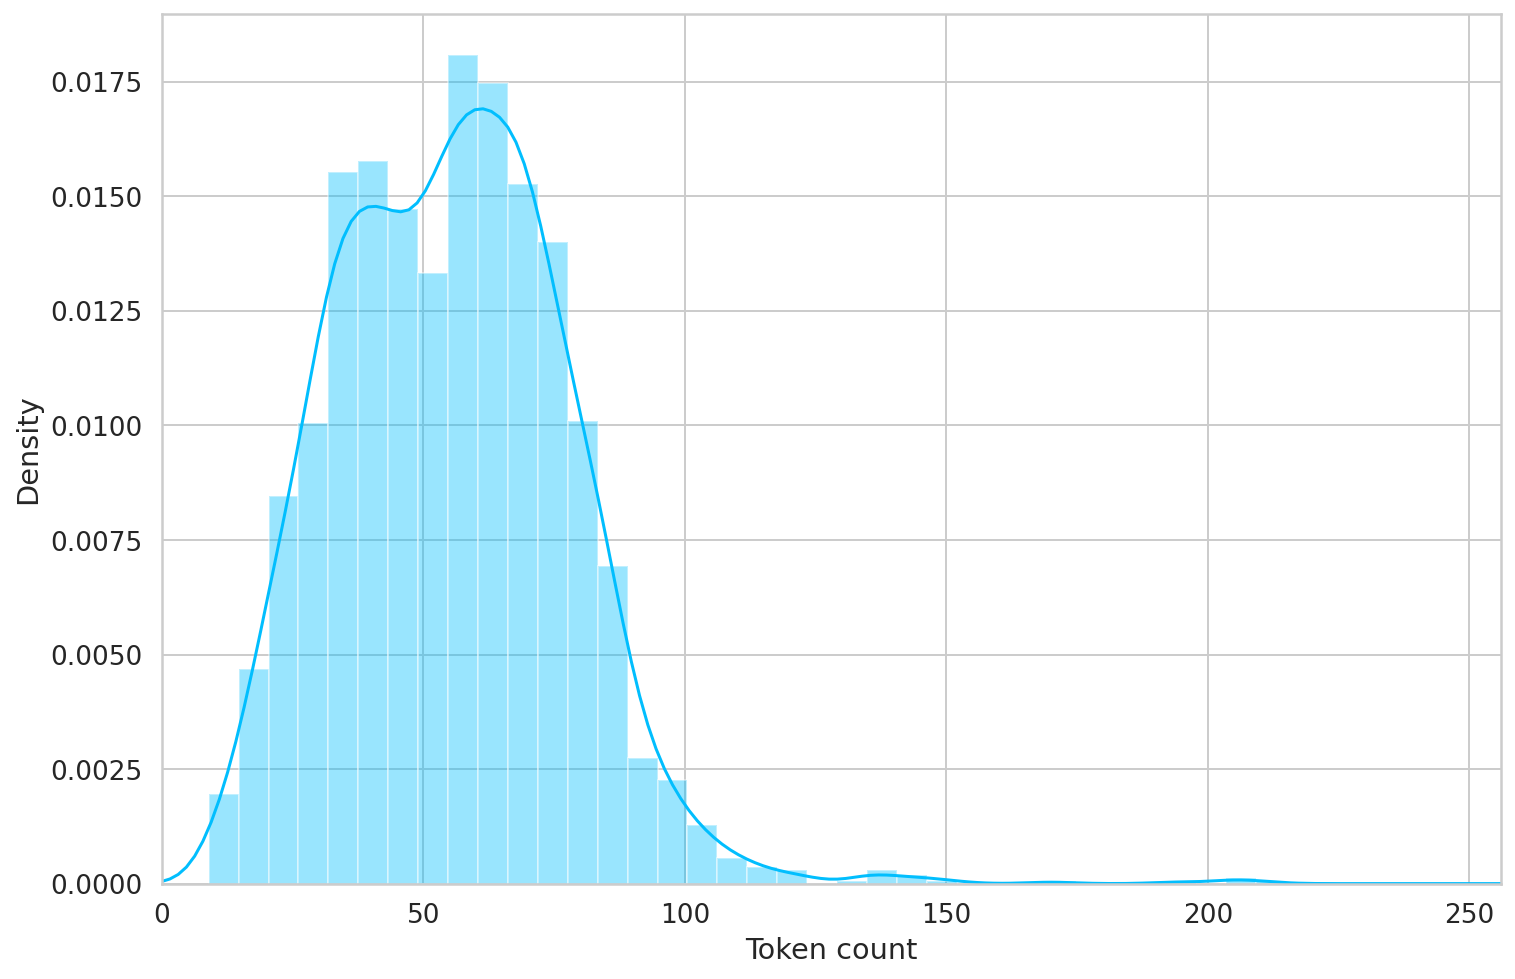

In [ ]:
# plot the distribution of review lengths 
sb.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

Most of the tweets seem to contain less than 125 tokens, but we’ll be on the safe side and choose a maximum length of 160.

In [ ]:
MAX_LEN = 200

#### Preparing Torch Dataset

To enter data into a PyTorch, we need a more robust data generator class. We will return the review text as well to validate our predictions easily.

In [ ]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

#### Test-Train Split

In [ ]:
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
# df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

# print(df_train.shape, df_val.shape, df_test.shape)

#### Create a dataloader to release data in batches.

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.tweet.to_numpy(),
        targets=df.stance.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

#### create a function to visualize the important keys from url

In [ ]:
# Create train, test and val data loaders
BATCH_SIZE = 8
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
# test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

#### Sentiment Classification with BERT and Hugging Face

We’ll use the Multilingual BertModel and build our sentiment classifier on top of it. Let’s load the model

In [ ]:
# Load theBERT model 
bert_model = BertModel.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at GroNLP/bert-base-dutch-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.

In [ ]:
# Build the Sentiment Classifier class 
class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME,return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  Add a dropout layer 
        output = self.drop(pooled_output)
        return self.out(output)

We use a dropout layer for some regularization and a fully-connected layer for our output. We are returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work. Create an instance and move it to the GPU

In [ ]:
df_train.stance.unique()

array([0, 1, 2])

In [ ]:
# Instantiate the model and move to classifier
class_names = [0,1,2]
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at GroNLP/bert-base-dutch-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at GroNLP/bert-base-dutch-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.

#### Model Characterstics

In [ ]:
# Number of hidden units
print(bert_model.config.hidden_size)

768


#### Training Phase

> we’ll use the AdamW optimizer provided by Hugging Face. It corrects weight decay. We’ll also use a linear scheduler with no warmup

In [ ]:
# Number of iterations 
EPOCHS = 8

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    return correct_predictions.double() / n_examples, np.mean(losses)

Write a function to evaluate model performance

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

Write the training Loop and store the best training state.

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/8
----------
Train loss 1.1389746011797763 accuracy 0.3683844011142061
Val   loss 1.1147450563999324 accuracy 0.36829268292682926

Epoch 2/8
----------
Train loss 1.1151474788992517 accuracy 0.3579387186629526
Val   loss 1.0836619207492242 accuracy 0.36829268292682926

Epoch 3/8
----------
Train loss 1.1085903038553542 accuracy 0.362116991643454
Val   loss 1.0795988153952818 accuracy 0.3926829268292683

Epoch 4/8
----------
Train loss 1.0862140340061242 accuracy 0.3986768802228412
Val   loss 1.0654903455422475 accuracy 0.3780487804878049

Epoch 5/8
----------
Train loss 1.0414143875448816 accuracy 0.44881615598885793
Val   loss 1.0354486841421862 accuracy 0.45121951219512196

Epoch 6/8
----------


In [ ]:
# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

#### Model Evaluation

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

Define a helper function to get predictions from our models. This is similar to the evaluation function, except that we’re storing the text of the reviews and the predicted probabilities

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)
    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

This confirms that our model is having difficulty classifying neutral reviews. It mistakes those for negative and positive at a roughly equal frequency.

That’s a good overview of the performance of our model.

## 8. Implementing the Solution

### Prediction Pipeline

In [ ]:
review_text = input(print("Enter tweet here..."))

In [ ]:
encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

In [ ]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes